<a href="https://colab.research.google.com/github/SumathiGit/Defect-Detection-Food-Package/blob/main/Food_Package_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img_zip_path = '/content/drive/My Drive/Proj/Img/Food_Product_Img.zip'

In [3]:
import os
import zipfile
import pandas as pd
import numpy as np
from PIL import Image

In [4]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
df = pd.read_csv("/content/drive/My Drive/Proj/Anno/food.csv")

In [6]:
df.head()

,filename,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bread,Label1_CAKE,Label1_Candy,Label1_Cans,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label2_BeansDefected,Label2_BeansPerfect,Label2_BeverageDefected,Label2_BeveragePerfect,Label2_BiscuitDefected,Label2_BiscuitPefect,Label2_BreadDefected,Label2_BreadPerfect,Label2_CakeDefected,Label2_CakePerfect,Label2_CandyDefected,Label2_CandyPerfect,Label2_CansDefected,Label2_CansPerfect,Label2_CerealDefected,Label2_CerealPerfect,Label2_ChipsDefected,Label2_ChipsPackDefected,Label2_ChipsPackPerfect,Label2_ChipsPerfect,Label2_ChocolateDefected,Label2_ChocolatePerfect,Defected,Perfect
0,6902007030087-back_camera1-1.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,6902007030087_camera1-1.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,6924743913738_camera0-40.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6901845043112_camera2-6.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,6920912342002_camera1-30.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [7]:
df = df.set_index("filename", drop = True)

In [8]:
df.head()

,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bread,Label1_CAKE,Label1_Candy,Label1_Cans,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label2_BeansDefected,Label2_BeansPerfect,Label2_BeverageDefected,Label2_BeveragePerfect,Label2_BiscuitDefected,Label2_BiscuitPefect,Label2_BreadDefected,Label2_BreadPerfect,Label2_CakeDefected,Label2_CakePerfect,Label2_CandyDefected,Label2_CandyPerfect,Label2_CansDefected,Label2_CansPerfect,Label2_CerealDefected,Label2_CerealPerfect,Label2_ChipsDefected,Label2_ChipsPackDefected,Label2_ChipsPackPerfect,Label2_ChipsPerfect,Label2_ChocolateDefected,Label2_ChocolatePerfect,Defected,Perfect
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6902007030087-back_camera1-1.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6902007030087_camera1-1.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6924743913738_camera0-40.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6901845043112_camera2-6.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6920912342002_camera1-30.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [9]:
df.index

Index(['6902007030087-back_camera1-1.jpg', '6902007030087_camera1-1.jpg',
       '6924743913738_camera0-40.jpg', '6901845043112_camera2-6.jpg',
       '6920912342002_camera1-30.jpg', '6901845043112-back_camera2-24.jpg',
       '6924743913738_camera2-5.jpg', '6924743913721_camera2-30.jpg',
       '6901845043112-back_camera2-16.jpg', '6920912342002_camera0-1.jpg',
       ...
       'CEREAL0249.jpg', 'CEREAL0023.jpg', 'CEREAL0225.jpg', 'CEREAL0257.jpg',
       'CEREAL0274.jpg', 'CEREAL0010.jpg', 'CEREAL0098.jpg', 'CEREAL0224.jpg',
       'CEREAL0013.jpg', 'CEREAL0254.jpg'],
      dtype='object', name='filename', length=1794)

In [10]:
from glob import glob

In [ ]:
Image.open('Files/Beans/BeansDefected/6926892501033_camera1-8.jpg').convert("RGB")

In [13]:
files = glob('Files/**/*.jpg', recursive=True)

In [14]:
print(files)

['Files/ChipsPack/ChipsPackDefected/6926265301024_camera2-34.jpg', 'Files/ChipsPack/ChipsPackDefected/6920912342002_camera1-30.jpg', 'Files/ChipsPack/ChipsPackDefected/6924743913721_camera3-23.jpg', 'Files/ChipsPack/ChipsPackDefected/6924743913738_camera0-40.jpg', 'Files/ChipsPack/ChipsPackDefected/6920912342002_camera1-1.jpg', 'Files/ChipsPack/ChipsPackDefected/6901845043112_camera2-6.jpg', 'Files/ChipsPack/ChipsPackDefected/6924743913721_camera2-30.jpg', 'Files/ChipsPack/ChipsPackDefected/6926265301024_camera1-30.jpg', 'Files/ChipsPack/ChipsPackDefected/6901845043112_camera1-1.jpg', 'Files/ChipsPack/ChipsPackDefected/6924743913721_camera2-10.jpg', 'Files/ChipsPack/ChipsPackDefected/6901845043112-back_camera2-16.jpg', 'Files/ChipsPack/ChipsPackDefected/6901845043112-back_camera2-24.jpg', 'Files/ChipsPack/ChipsPackDefected/6924743913738_camera1-23.jpg', 'Files/ChipsPack/ChipsPackDefected/6902007030087_camera1-1.jpg', 'Files/ChipsPack/ChipsPackDefected/6902007030087-back_camera1-1.jpg',

In [15]:
len(files)

1794

In [16]:
shuffle = np.random.permutation(len(files))

In [17]:
len(shuffle)

1794

In [18]:
len(shuffle)*0.3

538.1999999999999

In [19]:
max(shuffle)

1793

In [20]:
for i in ['train', 'valid']:
    os.mkdir(os.path.join('/tmp/', i))

In [21]:
!ls /tmp/

dap_multiplexer.43fb86348725.root.log.INFO.20210630-042351.50
dap_multiplexer.INFO
debugger_2hpi6enf49
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
tmpfpxz33gy
train
valid


In [22]:
files[10].split('/')[-1]

'6901845043112-back_camera2-16.jpg'

In [23]:
((np.array(df[df.index==files[10].split('/')[-1]]))).shape

(2, 35)

In [24]:
from tqdm import tqdm

In [25]:
valid_dict = {}
valid_file_names = []
for i in tqdm(shuffle[:52]):
    file_name = files[i].split('/')[-1]
    labels = np.array(df[df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/valid', file_name))

100%|██████████| 52/52 [00:00<00:00, 1831.33it/s]


In [26]:
print(file_name)

6956367187172_camera1-1.jpg


In [27]:
len(glob('/tmp/valid/*.jpg'))

52

In [28]:
valid_df = pd.DataFrame(valid_dict.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [29]:
valid_df.head()

,0
0,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
4,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [30]:
valid_df.index = valid_file_names

In [31]:
valid_df.head()

,0
6907992100272_camera1-7.jpg,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
CHIPS0073.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
6923523998019_camera0-40.jpg,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
6914973607125_camera3-8.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
6922907011528_camera0-28.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [32]:
valid_df.columns = ['labels']

In [102]:
print(labels)

['Label1_Beans', 'Label1_Beverage', 'Label1_Biscuits', 'Label1_Bread', 'Label1_CAKE', 'Label1_Candy', 'Label1_Cans', 'Label1_Cereal', 'Label1_Chips', 'Label1_ChipsPack', 'Label1_Chocolate', 'Label2_BeansDefected', 'Label2_BeansPerfect', 'Label2_BeverageDefected', 'Label2_BeveragePerfect', 'Label2_BiscuitDefected', 'Label2_BiscuitPefect', 'Label2_BreadDefected', 'Label2_BreadPerfect', 'Label2_CakeDefected', 'Label2_CakePerfect', 'Label2_CandyDefected', 'Label2_CandyPerfect', 'Label2_CansDefected', 'Label2_CansPerfect', 'Label2_CerealDefected', 'Label2_CerealPerfect', 'Label2_ChipsDefected', 'Label2_ChipsPackDefected', 'Label2_ChipsPackPerfect', 'Label2_ChipsPerfect', 'Label2_ChocolateDefected', 'Label2_ChocolatePerfect', 'Defected', 'Perfect']


In [33]:
train_dict = {}
train_file_names = []
for i in tqdm(shuffle[52:158 ]):
    file_name = files[i].split('/')[-1]
    labels = np.array(df[df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/train', file_name))

100%|██████████| 106/106 [00:00<00:00, 2178.19it/s]


In [34]:
!ls "/tmp/train"

4800009004827_camera0-2.jpg	   6956367187172_camera2-33.jpg
6901845042993_camera3-4.jpg	   6956367187172_camera3-40.jpg
6901845043112-back_camera2-24.jpg  6956367187172_camera3-6.jpg
6902007030087_camera3-18.jpg	   CAKE0010.jpg
6907777822948_camera0-20.jpg	   CAKE0018.jpg
6907777822948_camera1-28.jpg	   CAKE0035.jpg
6907992632483_camera3-29.jpg	   CAKE0037.jpg
6911316380288_camera1-1.jpg	   CAKE0038.jpg
6911316510005_camera1-1.jpg	   CAKE0041.jpg
6911988005397_camera0-24.jpg	   CAKE0063.jpg
6914973603394~A_camera2-18.jpg	   CAKE0075.jpg
6914973603394-back_camera0-14.jpg  CAKE0078.jpg
6914973607125_camera1-1.jpg	   CAKE0092.jpg
6914973607125_camera2-26.jpg	   CAKE0094.jpg
6914973607637_camera0-1.jpg	   CAKE0131.jpg
6914973608306~A_camera0-12.jpg	   CAKE0132.jpg
6922907011511-back_camera0-11.jpg  CAKE0160.jpg
6922907011511-back_camera1-40.jpg  CEREAL0015.jpg
6922907011511-back_camera2-11.jpg  CEREAL0016.jpg
6922907011511-back_camera2-40.jpg  CEREAL0031.jpg
6922907011528-back_camera0-40.j

In [35]:
len(train_dict)

106

In [36]:
train_df = pd.DataFrame(train_dict.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [37]:
train_df.head()

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."


In [38]:
train_df.columns

RangeIndex(start=0, stop=1, step=1)

In [39]:
train_df.index = train_file_names

In [40]:
train_df.columns = ['labels']

In [ ]:
"""Generating Batches and Training """

In [42]:
import torchvision
from glob import glob
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
%matplotlib inline

In [43]:
from torch.utils.data import Dataset

In [44]:
class MultiClassFoodPackage(Dataset):
    
    def __init__(self, dataframe, folder_dir, transform = None):
        
        self.dataframe = dataframe
        self.folder_dir = folder_dir
        self.transform = transform
        self.file_names = dataframe.index
        self.labels = dataframe.labels.values.tolist()
        
        
    def __len__(self):
        return len(self.dataframe)
    
    
    def __getitem__(self, index):
        
        image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
        label = self.labels[index][0]
        sample = {'image': image, 'label': label.astype(float)}
        if self.transform:
            image = self.transform(sample['image'])
            sample = {'image': image, 'label': label.astype(float)}
        
        return sample

In [45]:
tfms = transforms.Compose([transforms.Resize((256, 256)),
                           transforms.ToTensor()])

In [46]:
train_dl = MultiClassFoodPackage(train_df, '/tmp/train/', transform = tfms)

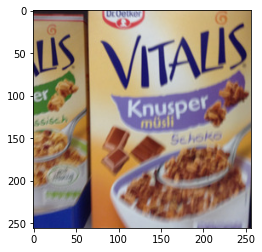

In [47]:
plt.imshow(torchvision.utils.make_grid(train_dl[1]['image']).permute(1, 2, 0))

In [48]:
(train_dl[1]['label'].astype(float))

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0.])

In [49]:
df.columns

Index(['Label1_Beans', 'Label1_Beverage', 'Label1_Biscuits', 'Label1_Bread',
       'Label1_CAKE', 'Label1_Candy', 'Label1_Cans', 'Label1_Cereal',
       'Label1_Chips', 'Label1_ChipsPack', 'Label1_Chocolate',
       'Label2_BeansDefected', 'Label2_BeansPerfect',
       'Label2_BeverageDefected', 'Label2_BeveragePerfect',
       'Label2_BiscuitDefected', 'Label2_BiscuitPefect',
       'Label2_BreadDefected', 'Label2_BreadPerfect', 'Label2_CakeDefected',
       'Label2_CakePerfect', 'Label2_CandyDefected', 'Label2_CandyPerfect',
       'Label2_CansDefected', 'Label2_CansPerfect', 'Label2_CerealDefected',
       'Label2_CerealPerfect', 'Label2_ChipsDefected',
       'Label2_ChipsPackDefected', 'Label2_ChipsPackPerfect',
       'Label2_ChipsPerfect', 'Label2_ChocolateDefected',
       'Label2_ChocolatePerfect', 'Defected', 'Perfect'],
      dtype='object')

In [51]:
valid_dl = MultiClassFoodPackage(valid_df, '/tmp/valid/', transform = tfms)

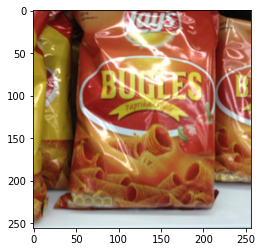

In [52]:
plt.imshow(torchvision.utils.make_grid(valid_dl[1]['image']).permute(1,2,0))

In [53]:
valid_dl[1]['label']

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0.])

In [54]:
import torch.nn.functional as F

In [63]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3), # 3, 256, 256
            nn.MaxPool2d(2), # op: 16, 127, 127
            nn.ReLU(), # op: 64, 127, 127
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # 64, 127, 127   
            nn.MaxPool2d(2), #op: 128, 63, 63
            nn.ReLU() # op: 128, 63, 63
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3), # 128, 63, 63
            nn.MaxPool2d(2), #op: 256, 30, 30
            nn.ReLU() #op: 256, 30, 30
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3), # 256, 30, 30
            nn.MaxPool2d(2), #op: 512, 14, 14
            nn.ReLU(), #op: 512, 14, 14
            nn.Dropout(0.2)
        )
        self.Linear1 = nn.Linear(512 * 14 * 14, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, 35)
        
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return F.sigmoid(x)

In [64]:
def check_cuda():
    _cuda = False
    if torch.cuda.is_available():
        _cuda = True
    return _cuda

In [65]:
is_cuda = check_cuda()

In [66]:
model = MultiClassifier()
#if is_cuda:
    # model.cuda()

In [67]:
train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 64, num_workers = 3)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 64, num_workers = 3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
"""evaluating our model based on how many correct labels our model in able to predict 
and summing the number of correct label predictions for every image to and 
then dividing it by the number of labels.""" 

In [68]:
def pred_acc(original, predicted):
    return torch.round(predicted).eq(original).sum().numpy()/len(original)

In [69]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [70]:
from pprint import pprint

In [71]:
def fit_model(epochs, model, dataloader, phase = 'training', volatile = False):
    
    pprint("Epoch: {}".format(epochs))

    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        volatile = True
        
    running_loss = []
    running_acc = []
    b = 0
    for i, data in enumerate(dataloader):
        

        inputs, target = data['image'], data['label'].float()
        
        inputs, target = Variable(inputs), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
            
        ops = model(inputs)
        
        acc_ = []
        for i, d in enumerate(ops, 0):
           
            acc = pred_acc(torch.Tensor.cpu(target[i]), torch.Tensor.cpu(d))
            acc_.append(acc)

        loss = criterion(ops, target)
                
        running_loss.append(loss.item())
        running_acc.append(np.asarray(acc_).mean())
        b += 1
       
        if phase == 'training':
            
            loss.backward()
        
            optimizer.step()
            
    total_batch_loss = np.asarray(running_loss).mean()
    total_batch_acc = np.asarray(running_acc).mean()
    

    pprint("{} loss is {} ".format(phase,total_batch_loss))
    pprint("{} accuracy is {} ".format(phase, total_batch_acc))
    
    return total_batch_loss, total_batch_acc

In [72]:
trn_losses = []; trn_acc = []
val_losses = []; val_acc = []
for i in tqdm(range(1, 20)):
    trn_l, trn_a = fit_model(i, model, train_dataloader)
    val_l, val_a = fit_model(i, model, valid_dataloader, phase = 'validation')
    trn_losses.append(trn_l); trn_acc.append(trn_a)
    val_losses.append(val_l); val_acc.append(val_a)


  0%|          | 0/19 [00:00<?, ?it/s]

'Epoch: 1'


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


'training loss is 0.6925009191036224 '
'training accuracy is 0.4993197278911565 '
'Epoch: 1'



  5%|▌         | 1/19 [01:14<22:14, 74.12s/it]

'validation loss is 0.6921073198318481 '
'validation accuracy is 0.5115384615384616 '
'Epoch: 2'
'training loss is 0.6924073696136475 '
'training accuracy is 0.5009778911564626 '
'Epoch: 2'



 11%|█         | 2/19 [02:28<21:03, 74.32s/it]

'validation loss is 0.6918976902961731 '
'validation accuracy is 0.5137362637362638 '
'Epoch: 3'
'training loss is 0.6920213103294373 '
'training accuracy is 0.5029443027210885 '
'Epoch: 3'



 16%|█▌        | 3/19 [03:44<19:53, 74.57s/it]

'validation loss is 0.6915531754493713 '
'validation accuracy is 0.519230769230769 '
'Epoch: 4'
'training loss is 0.6917767524719238 '
'training accuracy is 0.5114264455782314 '
'Epoch: 4'



 21%|██        | 4/19 [05:00<18:45, 75.04s/it]

'validation loss is 0.6911397576332092 '
'validation accuracy is 0.5269230769230769 '
'Epoch: 5'
'training loss is 0.6913543343544006 '
'training accuracy is 0.5239795918367347 '
'Epoch: 5'



 26%|██▋       | 5/19 [06:16<17:34, 75.29s/it]

'validation loss is 0.6907269358634949 '
'validation accuracy is 0.5357142857142857 '
'Epoch: 6'
'training loss is 0.6908201277256012 '
'training accuracy is 0.5283482142857143 '
'Epoch: 6'



 32%|███▏      | 6/19 [07:32<16:22, 75.56s/it]

'validation loss is 0.6902122497558594 '
'validation accuracy is 0.5445054945054946 '
'Epoch: 7'
'training loss is 0.6903380751609802 '
'training accuracy is 0.5358418367346938 '
'Epoch: 7'



 37%|███▋      | 7/19 [08:48<15:09, 75.81s/it]

'validation loss is 0.6896892189979553 '
'validation accuracy is 0.5467032967032968 '
'Epoch: 8'
'training loss is 0.6896719932556152 '
'training accuracy is 0.541220238095238 '
'Epoch: 8'


'validation loss is 0.6890952587127686 '
'validation accuracy is 0.55 '


 42%|████▏     | 8/19 [10:05<13:57, 76.12s/it]

'Epoch: 9'
'training loss is 0.6891694664955139 '
'training accuracy is 0.5437393707482993 '
'Epoch: 9'



 47%|████▋     | 9/19 [11:22<12:43, 76.31s/it]

'validation loss is 0.6885625720024109 '
'validation accuracy is 0.5510989010989011 '
'Epoch: 10'
'training loss is 0.688453882932663 '
'training accuracy is 0.5526998299319728 '
'Epoch: 10'



 53%|█████▎    | 10/19 [12:38<11:27, 76.38s/it]

'validation loss is 0.6879429221153259 '
'validation accuracy is 0.560989010989011 '
'Epoch: 11'
'training loss is 0.6879092454910278 '
'training accuracy is 0.5628932823129251 '
'Epoch: 11'



 58%|█████▊    | 11/19 [13:55<10:11, 76.45s/it]

'validation loss is 0.6872943639755249 '
'validation accuracy is 0.578021978021978 '
'Epoch: 12'
'training loss is 0.6872223615646362 '
'training accuracy is 0.577827380952381 '
'Epoch: 12'



 63%|██████▎   | 12/19 [15:11<08:54, 76.31s/it]

'validation loss is 0.6866422295570374 '
'validation accuracy is 0.5862637362637364 '
'Epoch: 13'
'training loss is 0.6865011751651764 '
'training accuracy is 0.5914859693877551 '
'Epoch: 13'



 68%|██████▊   | 13/19 [16:27<07:38, 76.36s/it]

'validation loss is 0.6859444975852966 '
'validation accuracy is 0.6010989010989012 '
'Epoch: 14'
'training loss is 0.6857725977897644 '
'training accuracy is 0.603858418367347 '
'Epoch: 14'
'validation loss is 0.6853300929069519 '
'validation accuracy is 0.6164835164835166 '



 74%|███████▎  | 14/19 [17:43<06:20, 76.17s/it]

'Epoch: 15'
'training loss is 0.6851151287555695 '
'training accuracy is 0.613764880952381 '
'Epoch: 15'



 79%|███████▉  | 15/19 [18:59<05:04, 76.08s/it]

'validation loss is 0.6845886707305908 '
'validation accuracy is 0.6258241758241758 '
'Epoch: 16'
'training loss is 0.6843583285808563 '
'training accuracy is 0.6282206632653062 '
'Epoch: 16'



 84%|████████▍ | 16/19 [20:14<03:47, 75.87s/it]

'validation loss is 0.683823823928833 '
'validation accuracy is 0.6417582417582417 '
'Epoch: 17'
'training loss is 0.6836291551589966 '
'training accuracy is 0.6388180272108843 '
'Epoch: 17'



 89%|████████▉ | 17/19 [21:30<02:31, 75.75s/it]

'validation loss is 0.6831211447715759 '
'validation accuracy is 0.651098901098901 '
'Epoch: 18'
'training loss is 0.6827479004859924 '
'training accuracy is 0.6569727891156463 '
'Epoch: 18'



 95%|█████████▍| 18/19 [22:46<01:15, 75.88s/it]

'validation loss is 0.6823701858520508 '
'validation accuracy is 0.6631868131868133 '
'Epoch: 19'
'training loss is 0.6820891797542572 '
'training accuracy is 0.6689625850340137 '
'Epoch: 19'



100%|██████████| 19/19 [24:02<00:00, 75.91s/it]

'validation loss is 0.6816341280937195 '
'validation accuracy is 0.6752747252747253 '


In [73]:
torch.save(model, "Defect_Detection_Model")

In [78]:
import matplotlib.pyplot as plt

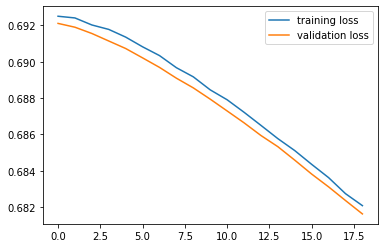

In [98]:
plt.plot(trn_losses, label='training loss')
plt.plot(val_losses,label='validation loss')
plt.legend()

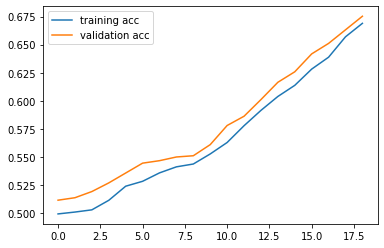

In [100]:
plt.plot(trn_acc, label='training acc')
plt.plot(val_acc,label='validation acc')
plt.legend()